In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, TimeDistributed, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/mhealth_full.csv'
df= pd.read_csv(path)
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


In [5]:
columns = ['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z']


In [6]:
def scaler(data, columns):

  for column in columns:
        data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
  return data
df = scaler(df, columns)

    0: 'Null',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'

In [7]:

df_activity_1 = df[df['activity'] == 1]
df_activity_2 = df[df['activity'] == 2]
df_activity_3 = df[df['activity'] == 3]
#df_activity_4 = df[df['activity'] == 4]
#df_activity_5 = df[df['activity'] == 5]
#df_activity_6 = df[df['activity'] == 6]
#df_activity_7 = df[df['activity'] == 7]
#df_activity_8 = df[df['activity'] == 8]
#df_activity_9 = df[df['activity'] == 9]
#df_activity_10 = df[df['activity'] == 10]
#df_activity_11 = df[df['activity'] == 11]
#df_activity_12 = df[df['activity'] == 12]

In [8]:
df = pd.concat([df_activity_1, df_activity_2, df_activity_3])

In [9]:
df.loc[df['activity'] == 3, 'activity'] = 0

In [10]:
df.activity.value_counts()

1    30720
2    30720
0    30720
Name: activity, dtype: int64

In [11]:
#X = df.drop(['activity', 'subject'], axis=1)
#y = df['activity']

In [12]:
TIME_PERIODS = 50
STEP_DISTANCE = 25
LABEL = 'activity'

def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    N_FEATURES = len(columns)
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0]
        labels.append(label)
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    return reshaped_segments, labels
X_data, y_data = create_segments_and_labels(df, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)

reshaped_segments shape :  (3685, 50, 21)
labels shape : (3685,)


In [13]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1, stratify=  y_data)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2948, 50, 21), (737, 50, 21), (2948,), (737,))

In [15]:
# Scale train/ test predictors based on training data
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [16]:
# Create train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1,stratify=  y_train)

In [17]:
# Convert output variables to categorical for CNN
y_train = to_categorical(y_train)
print(y_train.shape)

y_test = to_categorical(y_test)
print(y_test.shape)

y_val = to_categorical(y_val)
print(y_val.shape)

(2358, 3)
(737, 3)
(590, 3)


In [18]:
n_steps = 2
n_features = X_train.shape[2]
n_length = 25

X_train = X_train.reshape((X_train.shape[0], n_steps, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_features))
X_val = X_val.reshape((X_val.shape[0], n_steps, n_length, n_features))

In [19]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2358, 2, 25, 21) (2358, 3) (737, 2, 25, 21) (737, 3)


In [20]:
# Produce variables for CNN input/output shape
#Epoch 500
n_timesteps, n_features, n_outputs = n_steps * n_length, X_train.shape[3], y_train.shape[1]
#n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_timesteps,n_features,n_outputs

(50, 21, 3)

# CNN - LSTM

In [28]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        0: 'Lying down',
        1: 'Standing still',
        2: 'Sitting and relaxing'
        #3: 'Walking',
        #4: 'Climbing stairs',
        #5: 'Waist bends forward',
        #6: 'Frontal elevation of arms',
        #7: 'Knees bending (crouching)',
        #8: 'Cycling',
        #9: 'Jogging',
        #10: 'Running',
        #11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

# Layer3

# CNN1 - LSTM2

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDi  (None, None, 23, 64)      4096      
 stributed)                                                      
                                                                 
 time_distributed_9 (TimeDi  (None, None, 23, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_10 (TimeD  (None, None, 11, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_11 (TimeD  (None, None, 704)         0         
 istributed)                                                     
                                                                 
 lstm_3 (LSTM)               (None, None, 100)        

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 16s 21ms/step - loss: 0.2636 - accuracy: 0.9152 - val_loss: 2.2494e-04 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 5.8892e-05 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 1s 11ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 2.1709e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 12ms/step - loss: 2.4991e-04 - accuracy: 1.0000 - val_loss: 1.0421e-05 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 2s 22ms/step - loss: 1.5429e-04 - accuracy: 1.0000 - val_loss: 6.3130e-06 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 15ms/step - loss: 1.0391e-04 - accuracy: 1.0000 - val_loss: 4.3222e-06

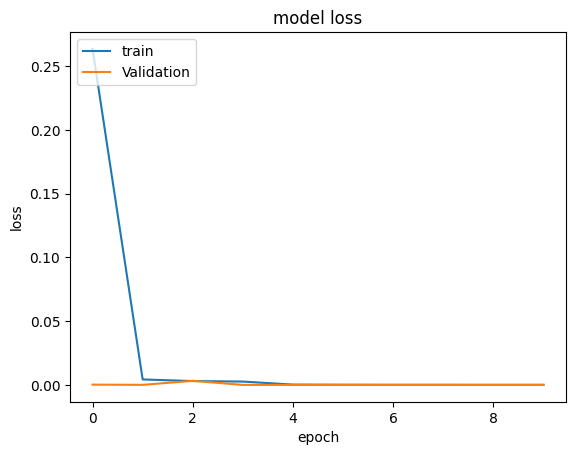

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

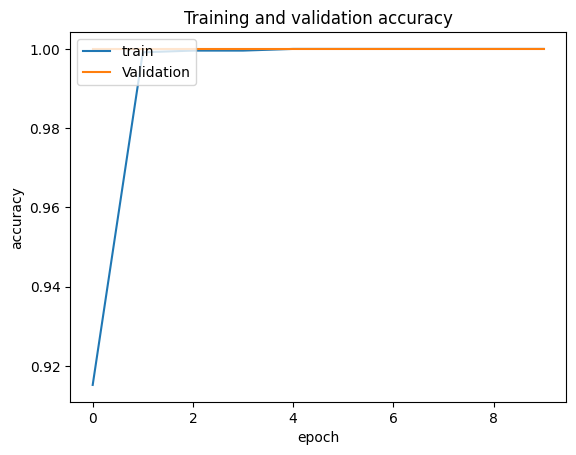

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 0s 3ms/step


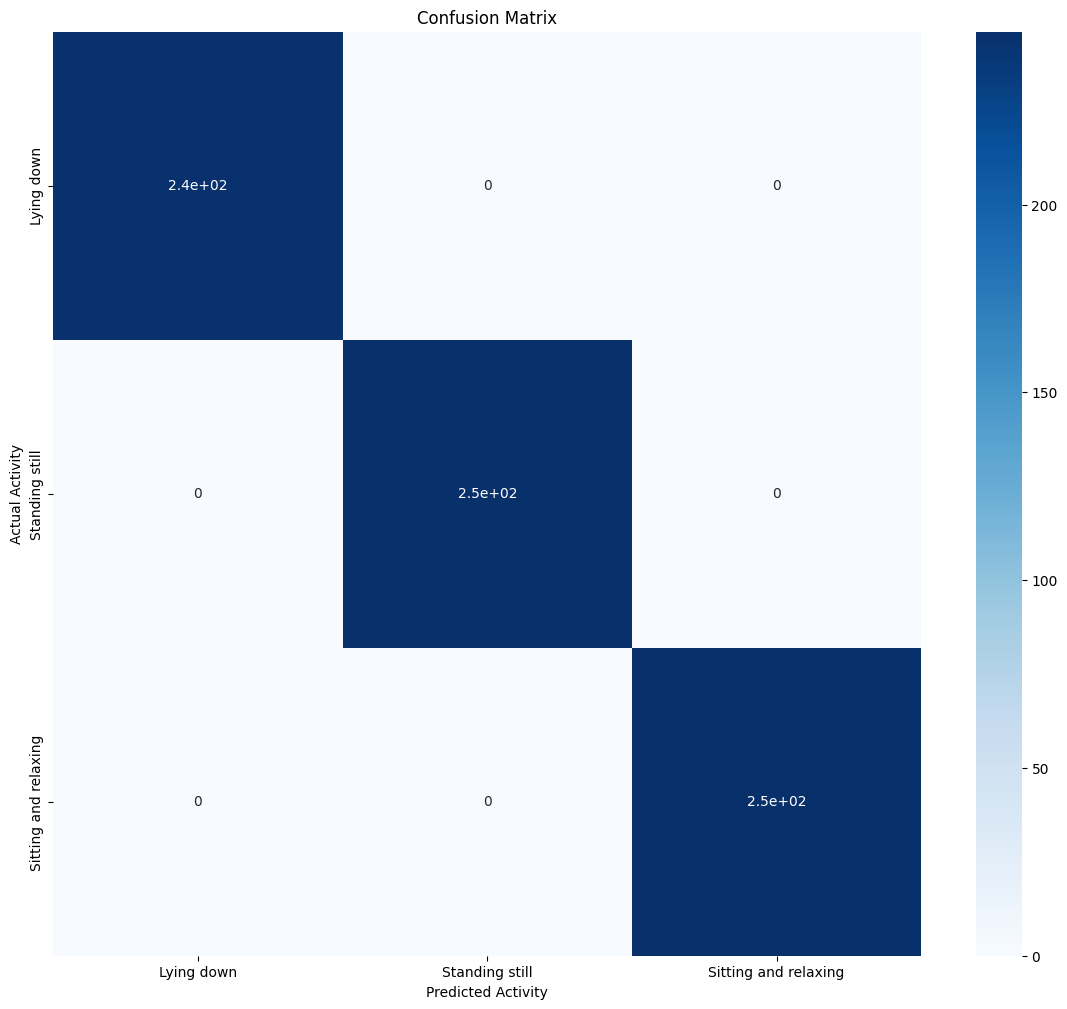

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM1

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_12 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_13 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_14 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_15 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_16 (TimeD  (None, None, 640)        

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 5s 13ms/step - loss: 0.1776 - accuracy: 0.9296 - val_loss: 4.5229e-04 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 0.9996 - val_loss: 1.1025e-04 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 0s 6ms/step - loss: 7.9429e-04 - accuracy: 1.0000 - val_loss: 4.0393e-05 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 0s 6ms/step - loss: 2.8431e-04 - accuracy: 1.0000 - val_loss: 2.0106e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 0s 6ms/step - loss: 1.8829e-04 - accuracy: 1.0000 - val_loss: 1.1752e-05 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 0s 6ms/step - loss: 1.3151e-04 - accuracy: 1.0000 - val_loss: 7.9964e-06 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 0s 6ms/step - loss: 9.1652e-05 - accuracy: 1.0000 - val_loss: 6.501

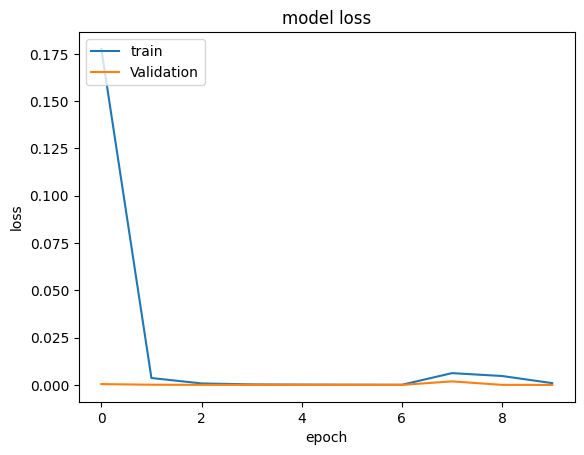

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

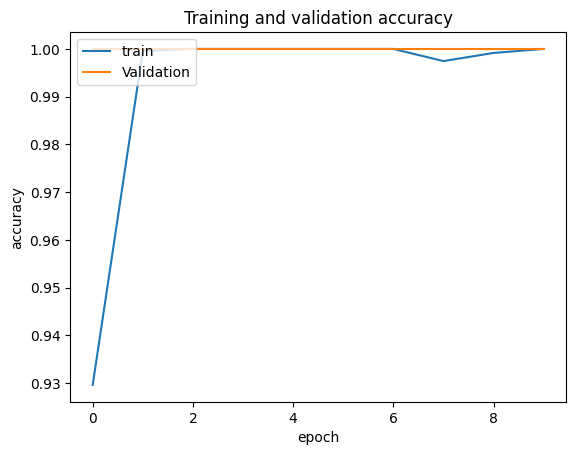

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

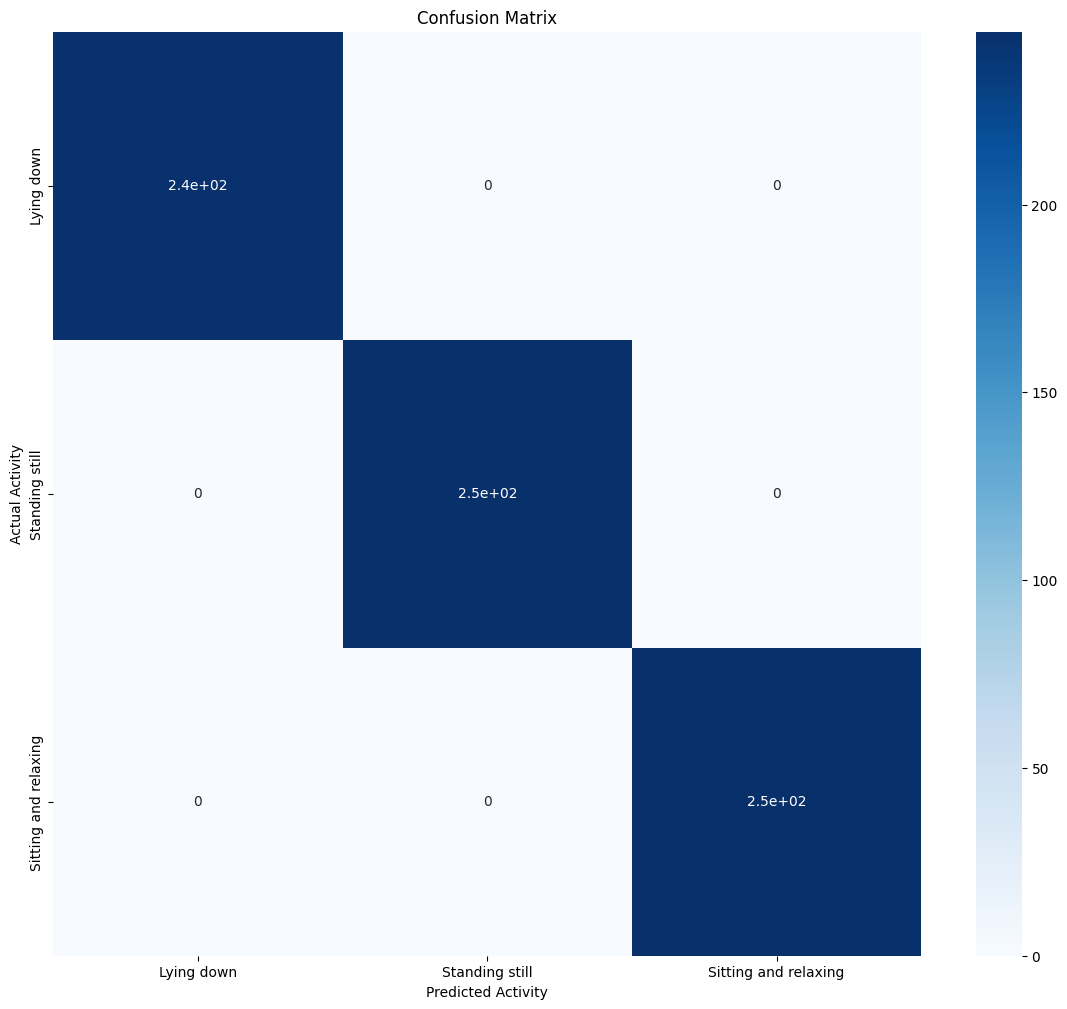

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:

y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# Layer 4

# CNN1 - LSTM3

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))


model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_17 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_18 (TimeD  (None, None, 23, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_19 (TimeD  (None, None, 11, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_20 (TimeD  (None, None, 704)         0         
 istributed)                                                     
                                                                 
 lstm_6 (LSTM)               (None, None, 100)        

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 11s 67ms/step - loss: 0.3889 - accuracy: 0.8363 - val_loss: 3.0959e-04 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 1s 16ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 4.1608e-05 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 1s 14ms/step - loss: 5.9735e-04 - accuracy: 1.0000 - val_loss: 2.3793e-05 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 13ms/step - loss: 4.3842e-04 - accuracy: 1.0000 - val_loss: 1.3840e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 11ms/step - loss: 4.7044e-04 - accuracy: 1.0000 - val_loss: 7.5816e-06 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 1s 10ms/step - loss: 1.4712e-04 - accuracy: 1.0000 - val_loss: 4.8994e-06 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 9ms/step - loss: 1.3762e-04 - accuracy: 1.0000 - val_loss:

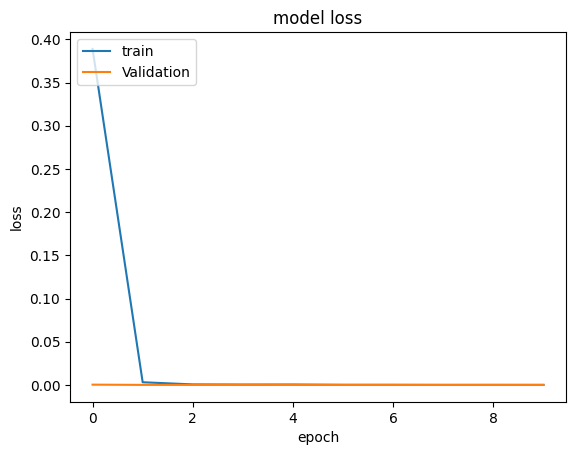

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

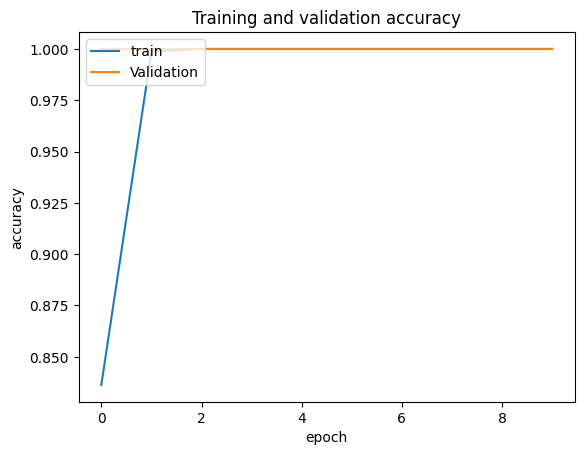

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 3s 5ms/step


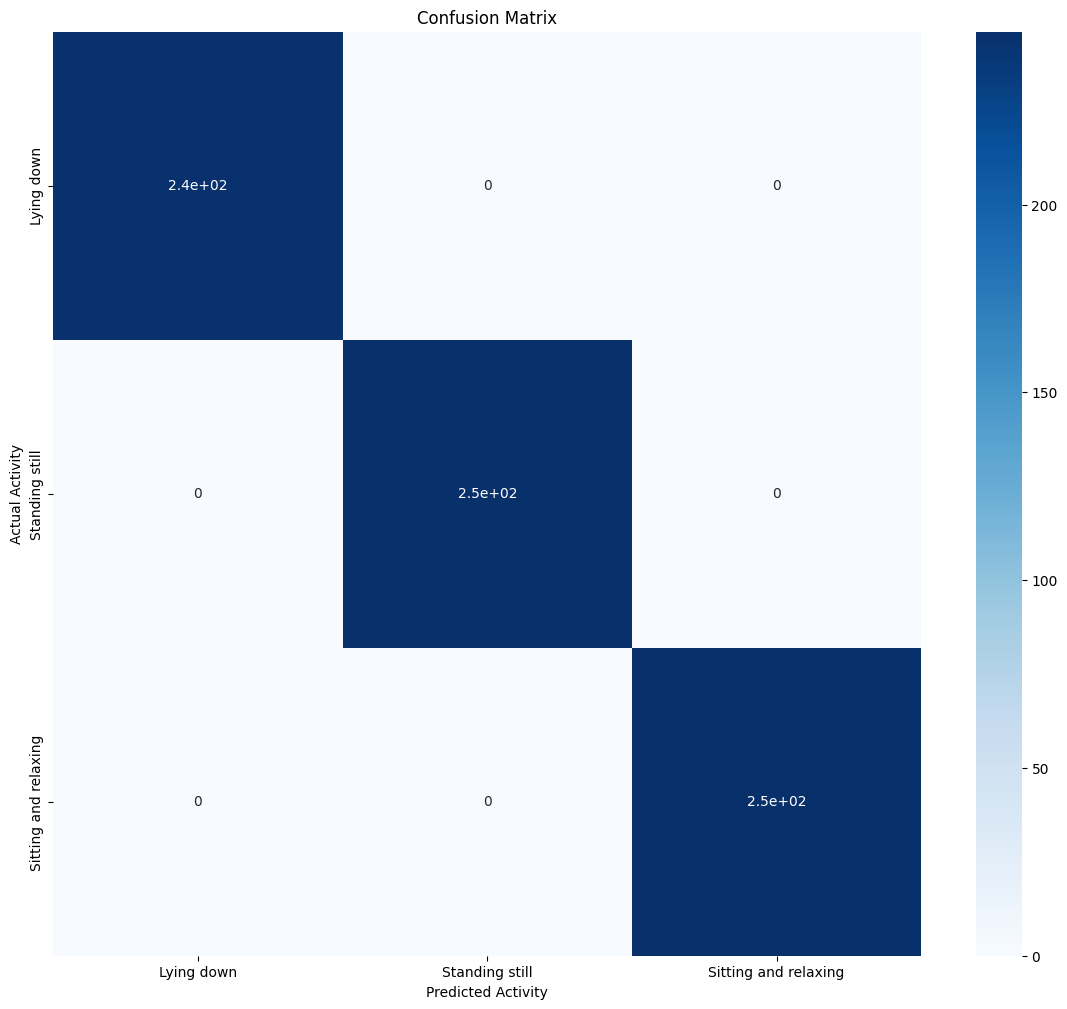

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM2

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_21 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_22 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_23 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_24 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_25 (TimeD  (None, None, 640)        

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 6s 19ms/step - loss: 0.2736 - accuracy: 0.9080 - val_loss: 3.1863e-04 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 1s 8ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.1304e-05 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 1s 8ms/step - loss: 9.8395e-04 - accuracy: 1.0000 - val_loss: 2.0893e-05 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 10ms/step - loss: 2.8571e-04 - accuracy: 1.0000 - val_loss: 1.0019e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 11ms/step - loss: 1.9989e-04 - accuracy: 1.0000 - val_loss: 5.6719e-06 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 1s 10ms/step - loss: 1.1091e-04 - accuracy: 1.0000 - val_loss: 3.8755e-06 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 14ms/step - loss: 8.2744e-05 - accuracy: 1.0000 - val_loss: 2

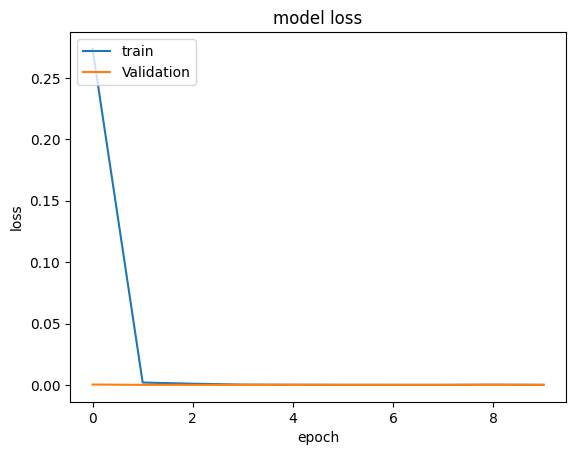

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

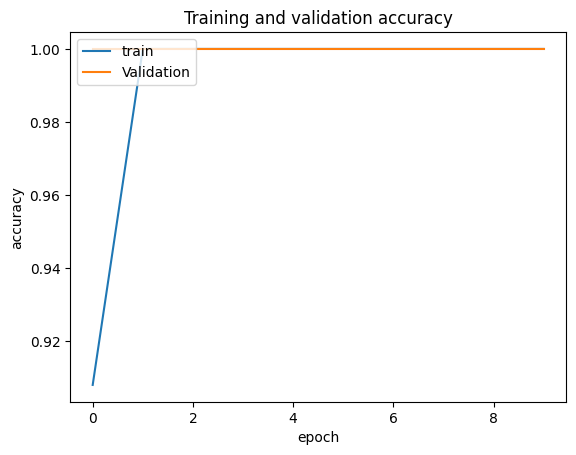

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 1s 5ms/step


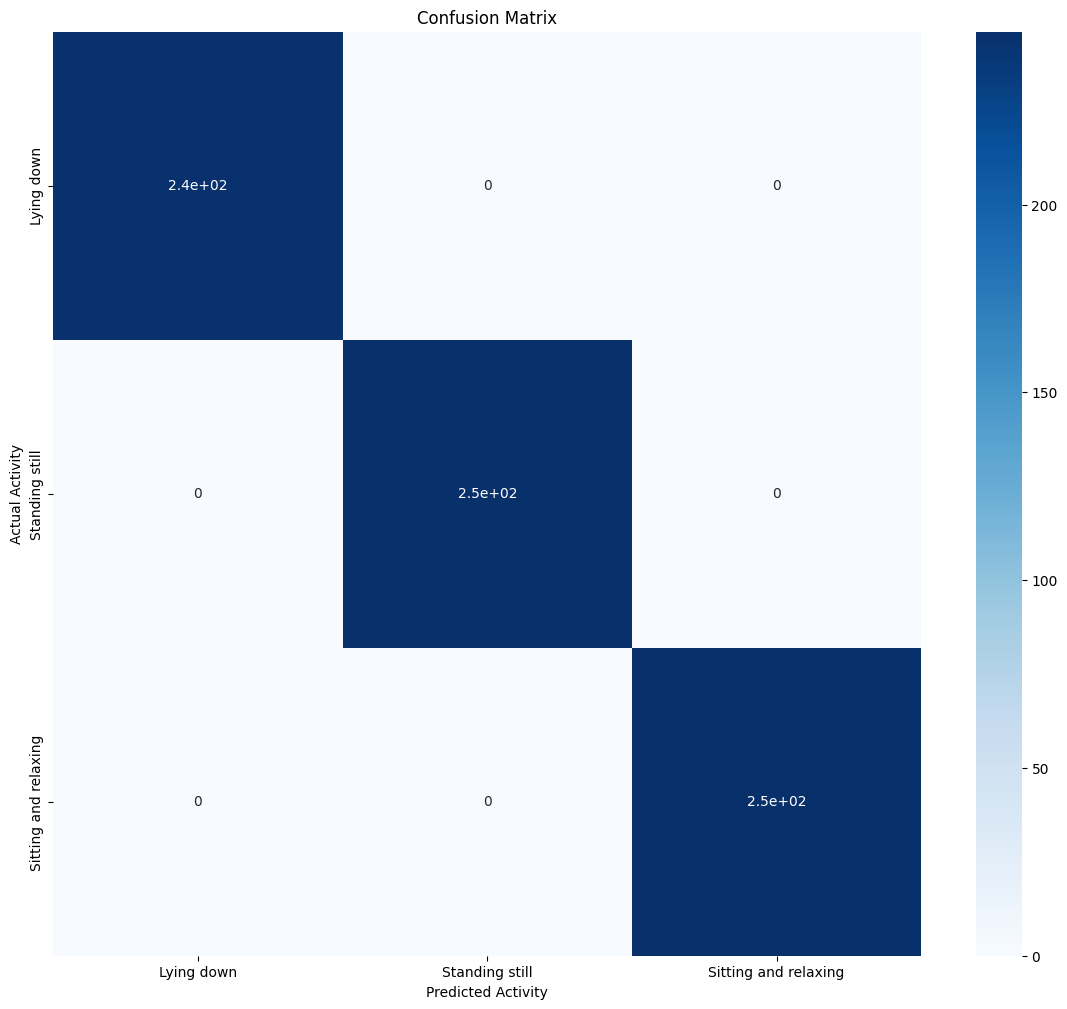

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN3 - LSTM1

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))


model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_26 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_27 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_28 (TimeD  (None, None, 19, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_29 (TimeD  (None, None, 19, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_30 (TimeD  (None, None, 9, 64)      

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 4s 15ms/step - loss: 0.1905 - accuracy: 0.9313 - val_loss: 5.7598e-04 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 1s 7ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 1.7323e-04 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 5.7168e-05 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 7ms/step - loss: 4.2620e-04 - accuracy: 1.0000 - val_loss: 2.6595e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 0s 7ms/step - loss: 2.8583e-04 - accuracy: 1.0000 - val_loss: 1.7457e-05 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 0s 7ms/step - loss: 3.5733e-04 - accuracy: 1.0000 - val_loss: 2.9869e-05 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0020 - accuracy: 0.9983 - val_loss: 2.4433e-04 -

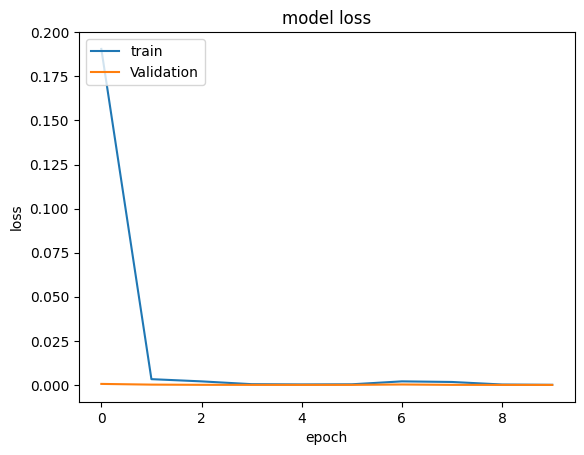

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

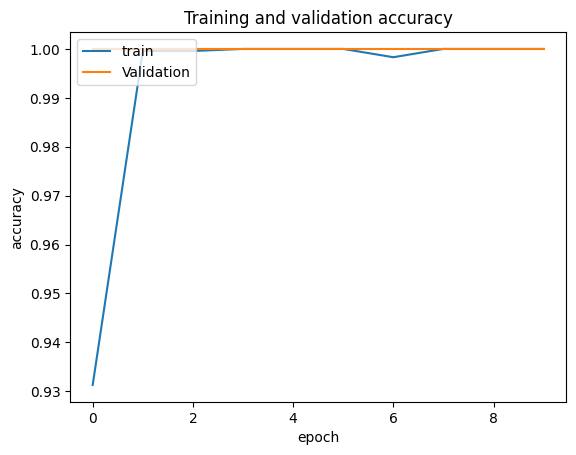

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 1s 3ms/step


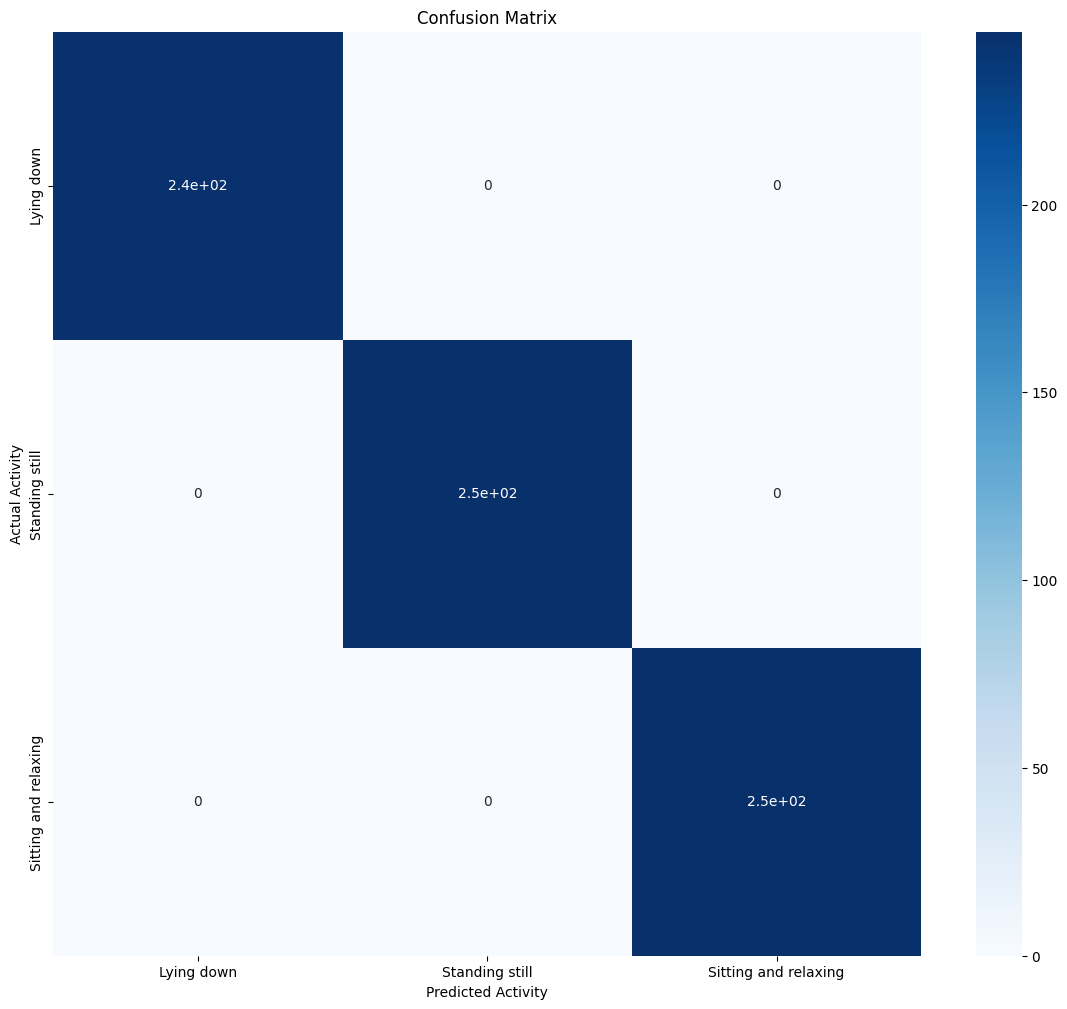

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# Layer5

# CNN4 - LSTM1

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))


model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))


model.add(TimeDistributed(Flatten()))


model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_32 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_33 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_34 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_35 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_36 (TimeD  (None, None, 8, 64)      

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 6s 17ms/step - loss: 0.4113 - accuracy: 0.8045 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 1s 7ms/step - loss: 0.0240 - accuracy: 0.9941 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 1s 7ms/step - loss: 0.0146 - accuracy: 0.9945 - val_loss: 5.8861e-04 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 11ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 2.8518e-04 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 11ms/step - loss: 0.0024 - accuracy: 0.9996 - val_loss: 1.3354e-04 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 1s 9ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 6.1544e-05 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 2.8180e-04 - val_accuracy: 1.0

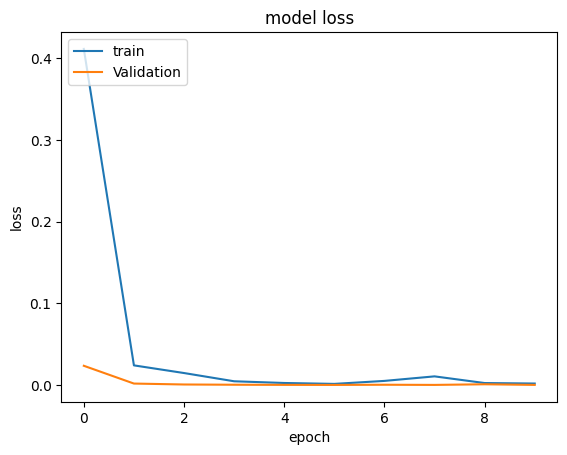

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

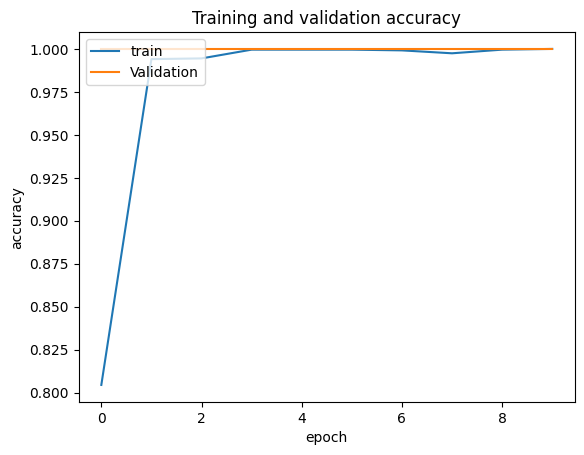

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 1s 5ms/step


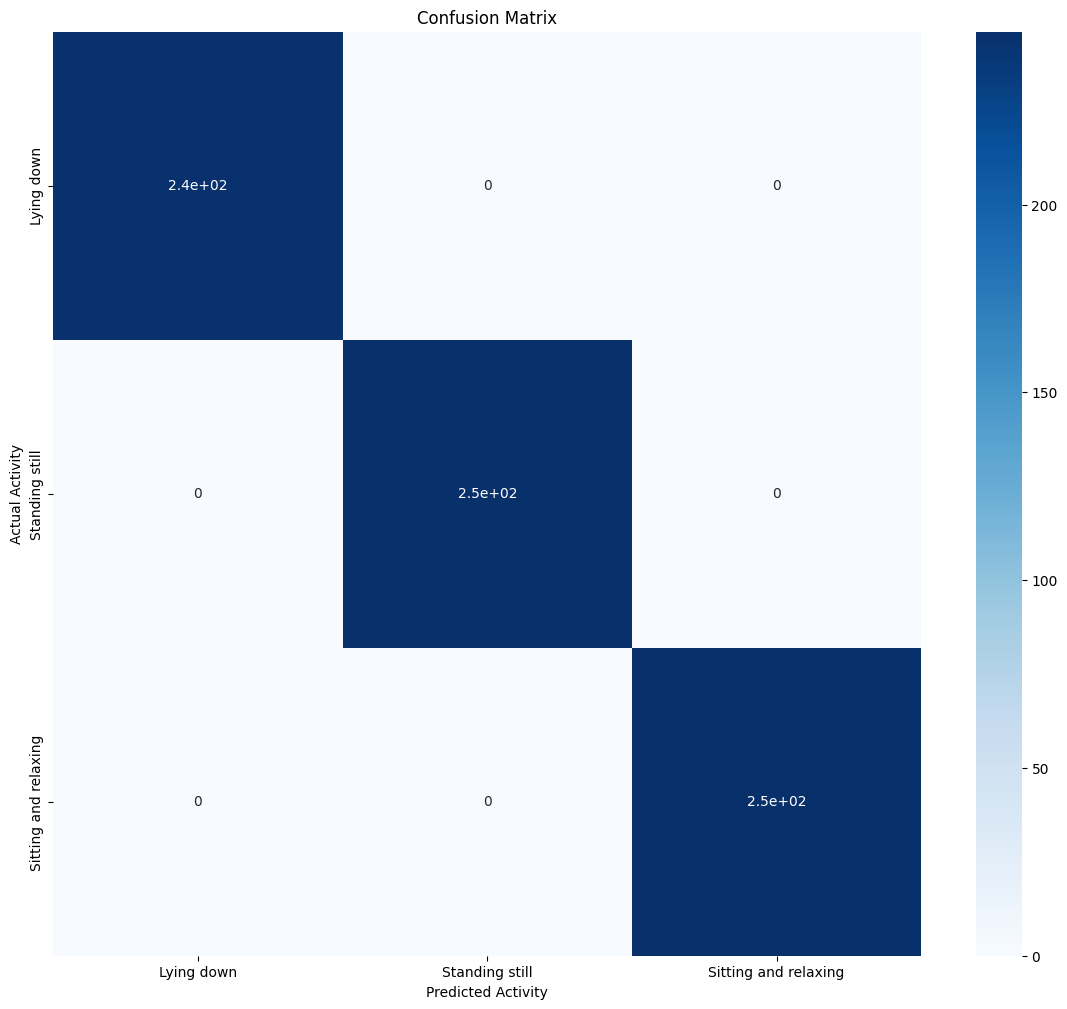

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

#CNN3-LSTM2

In [22]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))


model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))


model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))


model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDi  (None, None, 23, 64)      4096      
 stributed)                                                      
                                                                 
 time_distributed_9 (TimeDi  (None, None, 21, 64)      12352     
 stributed)                                                      
                                                                 
 time_distributed_10 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_11 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_12 (TimeD  (None, None, 8, 64)      

In [23]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 16s 75ms/step - loss: 0.4428 - accuracy: 0.7981 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 4s 53ms/step - loss: 0.0258 - accuracy: 0.9894 - val_loss: 2.7343e-04 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 4s 50ms/step - loss: 0.0152 - accuracy: 0.9958 - val_loss: 5.0416e-04 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 3s 40ms/step - loss: 0.0099 - accuracy: 0.9966 - val_loss: 6.0878e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 3s 45ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 4.1032e-05 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 3s 44ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 2.1323e-05 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 4s 47ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 1.1587e-04 - val_accur

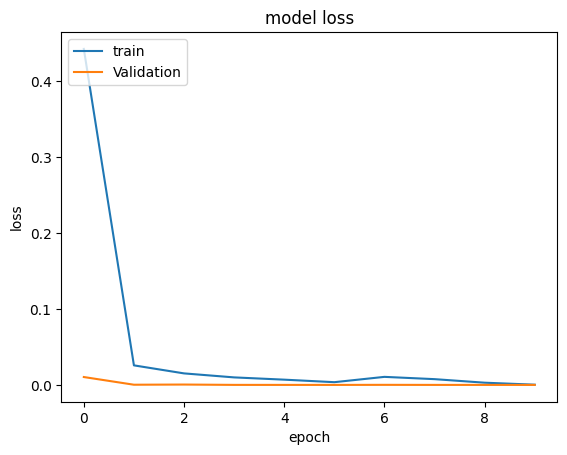

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

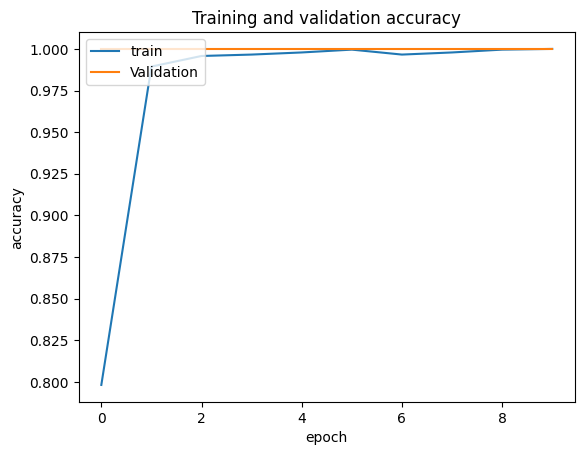

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 0s 8ms/step


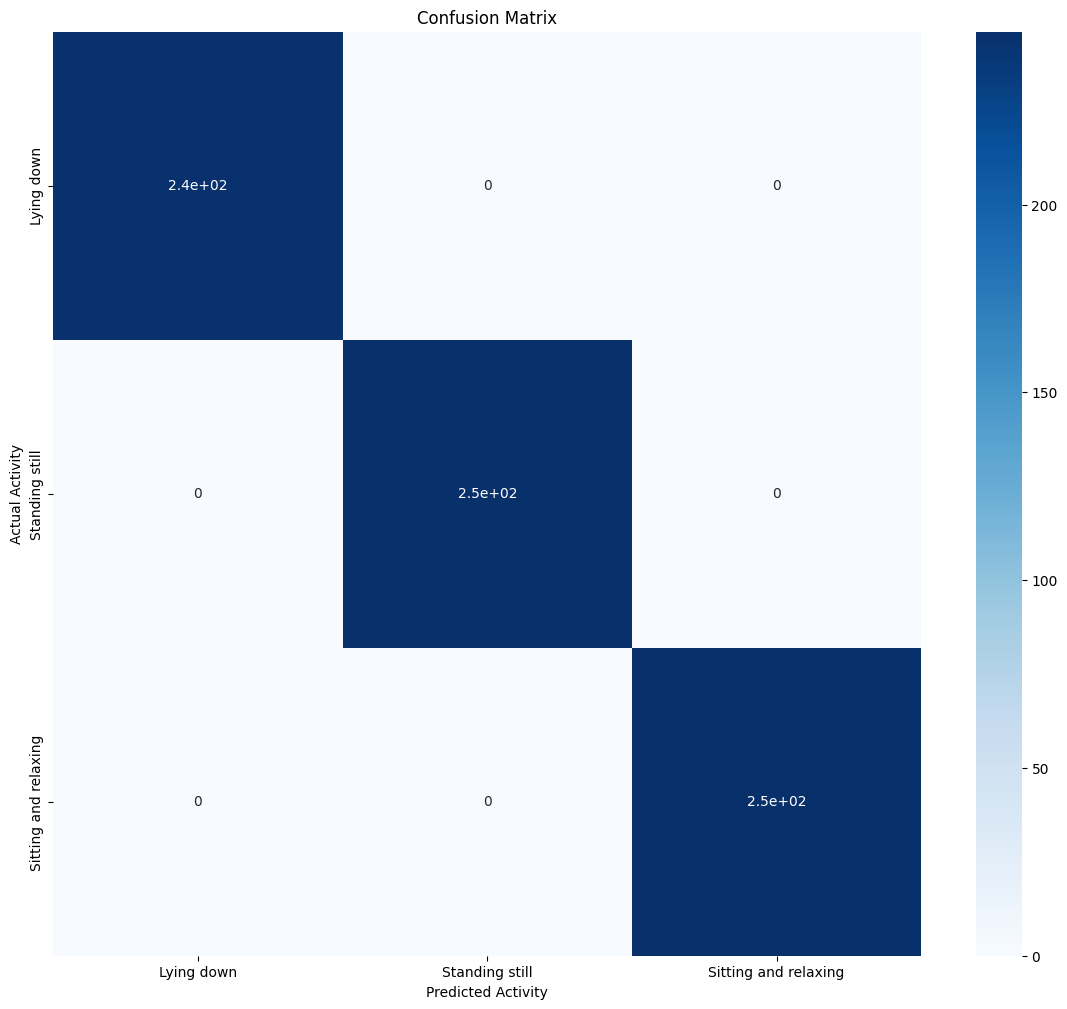

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [29]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2-LSTM3

In [30]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))


model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))




model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_16 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_17 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_18 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_19 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_20 (TimeD  (None, None, 640)        

In [31]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 10s 42ms/step - loss: 0.4016 - accuracy: 0.8410 - val_loss: 2.9120e-04 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 2s 25ms/step - loss: 0.0056 - accuracy: 0.9996 - val_loss: 3.4820e-05 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 3s 39ms/step - loss: 0.0046 - accuracy: 0.9996 - val_loss: 5.9860e-05 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 3s 39ms/step - loss: 0.0029 - accuracy: 0.9987 - val_loss: 2.2568e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 2s 32ms/step - loss: 9.6825e-04 - accuracy: 1.0000 - val_loss: 1.0782e-05 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 2s 25ms/step - loss: 1.8640e-04 - accuracy: 1.0000 - val_loss: 5.1227e-06 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 2s 25ms/step - loss: 1.4389e-04 - accuracy: 1.0000 - val_loss: 3.0265

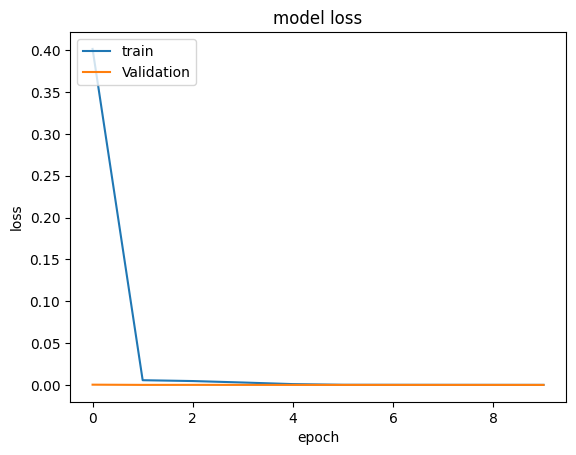

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

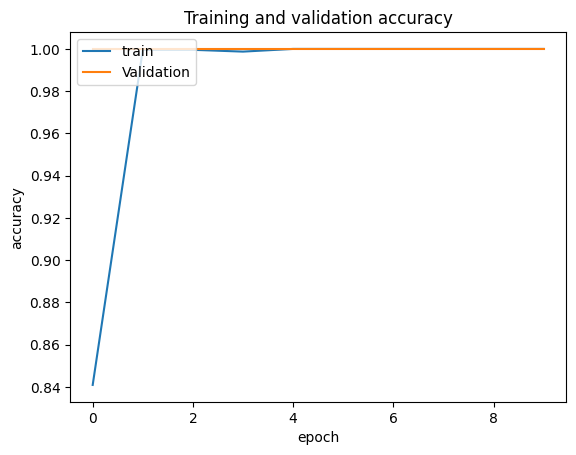

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 1s 7ms/step


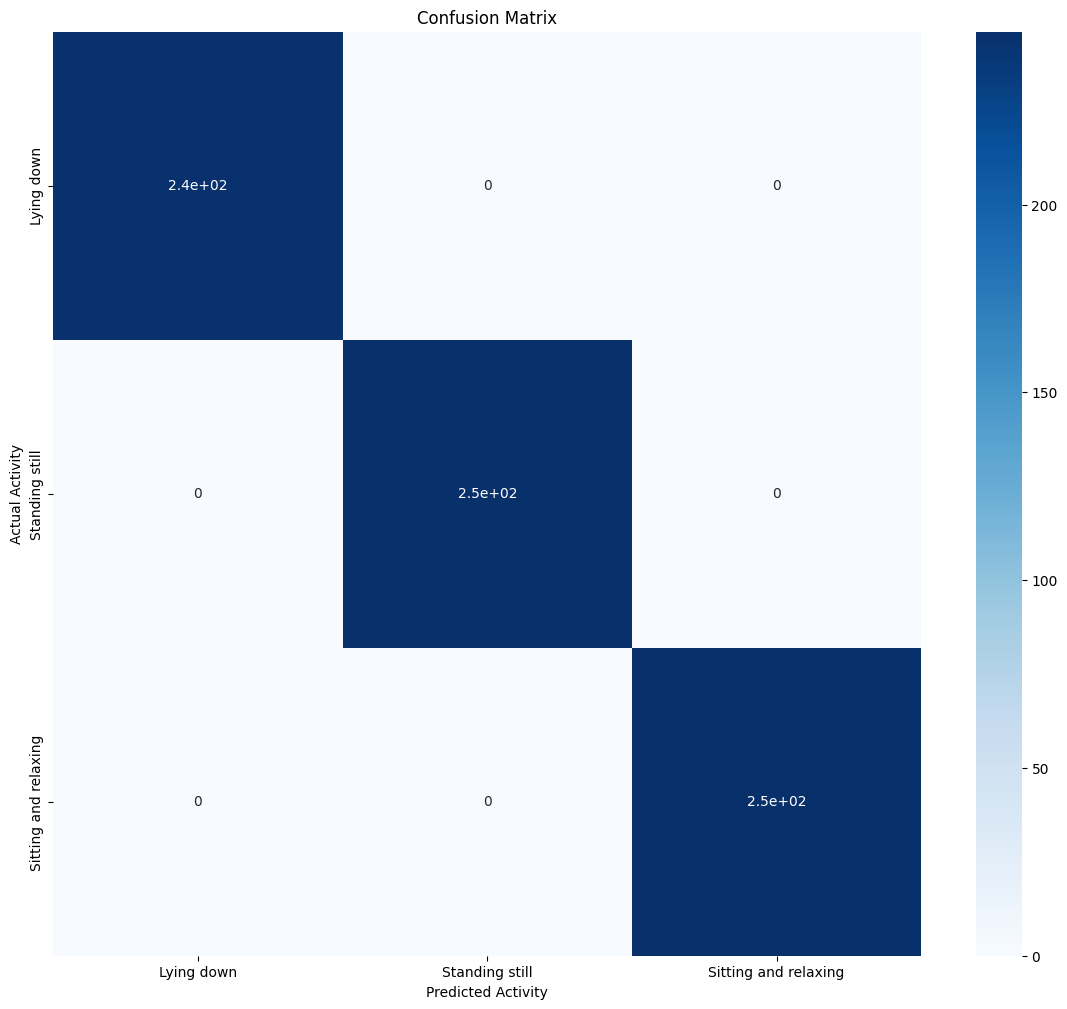

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [34]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN1-LSTM4

In [35]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_21 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_22 (TimeD  (None, None, 23, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_23 (TimeD  (None, None, 11, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_24 (TimeD  (None, None, 704)         0         
 istributed)                                                     
                                                                 
 lstm_7 (LSTM)               (None, None, 100)        

In [36]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 14s 67ms/step - loss: 0.5975 - accuracy: 0.6989 - val_loss: 0.0621 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 3s 34ms/step - loss: 0.0211 - accuracy: 0.9949 - val_loss: 1.0199e-04 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 2s 25ms/step - loss: 6.8406e-04 - accuracy: 1.0000 - val_loss: 3.6559e-05 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 2s 25ms/step - loss: 3.3548e-04 - accuracy: 1.0000 - val_loss: 1.9370e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 2s 25ms/step - loss: 2.5083e-04 - accuracy: 1.0000 - val_loss: 1.2344e-05 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 3s 34ms/step - loss: 1.3243e-04 - accuracy: 1.0000 - val_loss: 8.4933e-06 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 3s 42ms/step - loss: 1.2230e-04 - accuracy: 1.0000 - val_loss: 5.

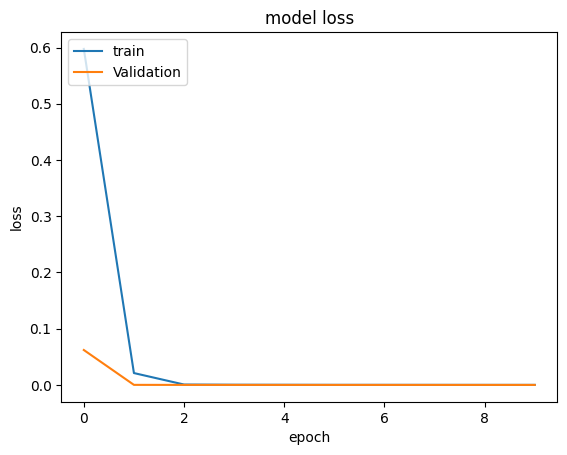

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

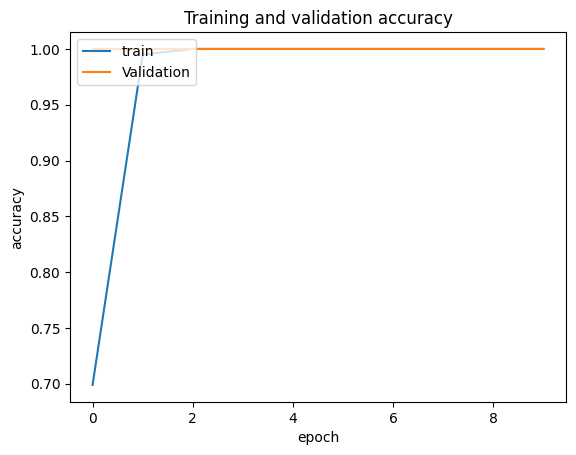

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 3s 8ms/step


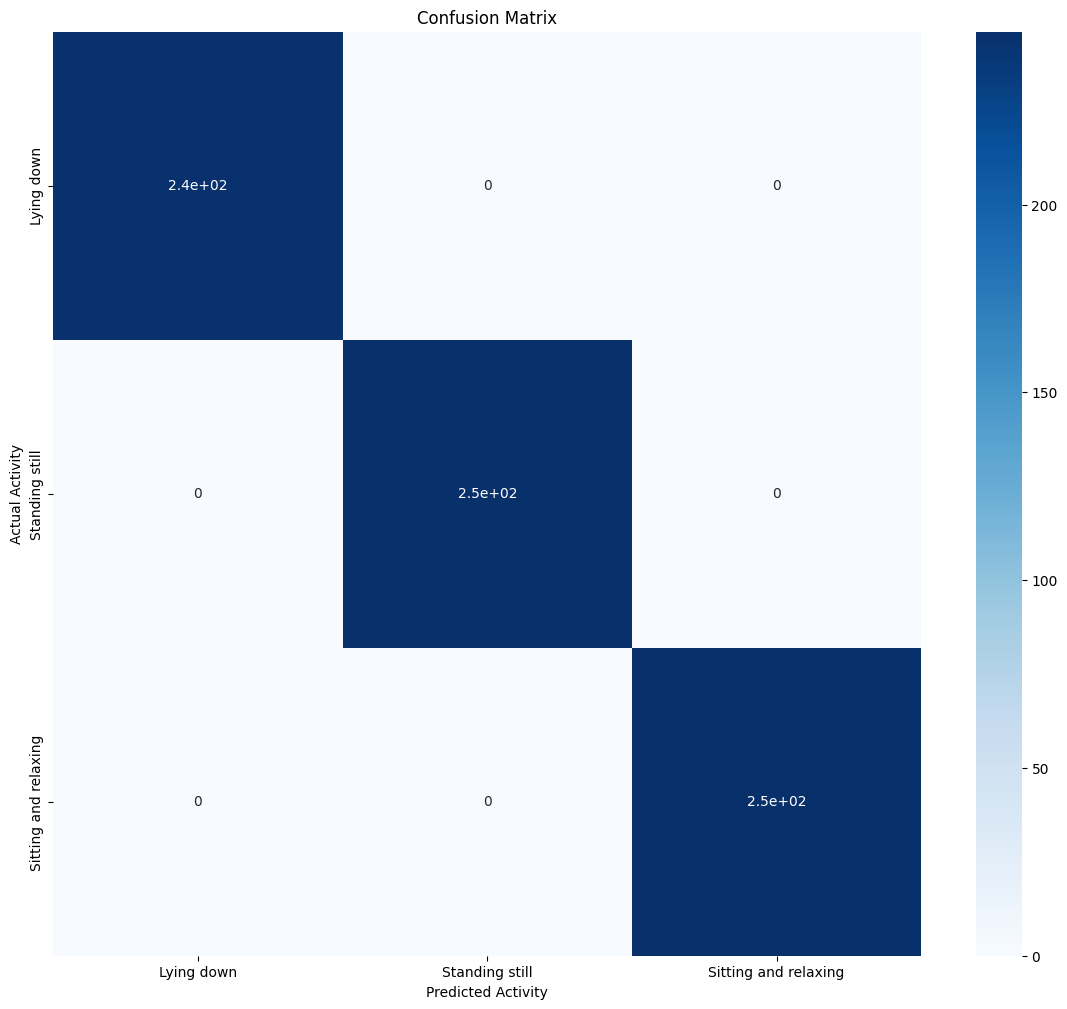

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [39]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)